In [1]:
import numpy
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = 'data/photos/cifar10'

cifar10 = datasets.CIFAR10(
  data_path, train=True, download=True,
  transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
  ]))
cifar10_val = datasets.CIFAR10(
  data_path, train=False, download=True,
  transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
  ]))

Files already downloaded and verified
Files already downloaded and verified


In [4]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
  for img, label in cifar10
    if label in [0, 2]]
cifar2_val = [(img, label_map[label])
  for img, label in cifar10_val
    if label in [0, 2]]

In [5]:
connected_model = nn.Sequential(
  nn.Linear(3072, 1024),
  nn.Tanh(),
  nn.Linear(1024, 512),
  nn.Tanh(),
  nn.Linear(512, 128),
  nn.Tanh(),
  nn.Linear(128, 2)
)

numel_list = [p.numel()
  for p in connected_model.parameters()
    if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [6]:
first_model = nn.Sequential(
  nn.Linear(3072, 512),
  nn.Tanh(),
  nn.Linear(512, 2),
  nn.LogSoftmax(dim=1)
)

numel_list = [p.numel()
  for p in first_model.parameters()
    if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [7]:
linear = nn.Linear(3072, 1024)
print(linear.weight.shape, linear.bias.shape)

torch.Size([1024, 3072]) torch.Size([1024])


In [8]:
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
print(conv)
#print()
#print('conv.weight:\n', conv.weight)
print()
print('conv.bias:\n', conv.bias)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

conv.bias:
 Parameter containing:
tensor([-0.0741,  0.1235, -0.0740,  0.0567,  0.1864, -0.0789,  0.1390, -0.0788,
        -0.0179, -0.0911,  0.0567, -0.0213, -0.1846,  0.1796, -0.1617, -0.1048],
       requires_grad=True)


In [9]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [10]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

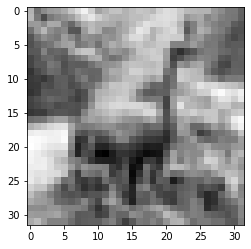

In [11]:
plt.imshow(img.mean(0), cmap='gray')
plt.show()

Parameter containing:
tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]],

         [[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]],

         [[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]], requires_grad=True) Parameter containing:
tensor([1.], requires_grad=True)
torch.Size([1, 1, 34, 62])


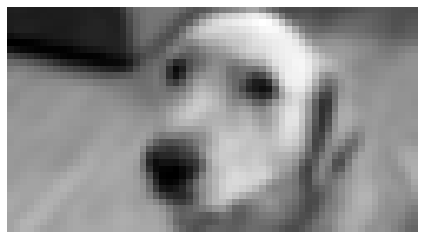

In [33]:
import PIL
img = numpy.array(PIL.Image.open(fp = './data/photos/bobby_2.jpg').convert('RGB'))
img = torch.tensor(img).permute(2, 0, 1).unsqueeze(dim = 0)/255
fig, ax = plt.subplots()
# ax[0].imshow(img.squeeze().permute(1, 2, 0))
# ax[0].axis('off')
conv = nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 3)
with torch.no_grad():
#     Identity:
#     conv.weight[:] = torch.tensor([[0.0, 0.0, 0.0],
#                                    [0.0, 1.0, 0.0],
#                                    [0.0, 0.0, 0.0]])
#     Vertical edge 
#     conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
#                                    [-1.0, 0.0, 1.0],
#                                    [-1.0, 0.0, 1.0]])
#     conv.weight[:] = torch.tensor([[1.0, 0.0, -1.0],
#                                    [1.0, 0.0, -1.0],
#                                    [1.0, 0.0, -1.0]])
#     Horizontal edge
#     conv.weight[:] = torch.tensor([[1.0, 1.0, 1.0],
#                                    [0.0, 0.0, 0.0],
#                                    [-1.0, -1.0, -1.0]])
#     conv.weight[:] = torch.tensor([[-1.0, -1.0, -1.0],
#                                    [0.0, 0.0, 0.0],
#                                    [1.0, 1.0, 1.0]])
#     Diagonal edge
#     conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
#                                   [0.0, 0.0, 0.0],
#                                   [1.0, 0.0, -1.0]])
#     Edge detection
#     conv.weight[:] = torch.tensor([[-1.0, -1.0, -1.0],
#                                    [-1.0, 8.0, -1.0],
#                                    [-1.0, -1.0, -1.0]])
    conv.weight[:] = torch.tensor([[0, -1, 0],
                                   [-1, 4, -1],
                                   [0, -1, 0]])
#     Sharpen
#     conv.weight[:] = torch.tensor([[0.0, -1.0, 0.0],
#                                    [-1.0, 5.0, -1.0],
#                                    [0.0, -1.0, 0.0]])
    # Blur
#     conv.weight[:] = 1
    # Guassian Blur
    conv.weight[:] = torch.tensor([[1, 2, 1],
                                   [2, 4, 2],
                                   [1, 2, 1]]) * (1/16)
    # Blur
    conv.bias /= conv.bias
print(conv.weight, conv.bias)

conv_img = conv(img)
print(conv_img.size())
ax.imshow(conv_img.detach().squeeze(), cmap = 'gray')
ax.axis('off')
plt.tight_layout()
plt.show()

TypeError: Invalid shape (3, 36, 64) for image data

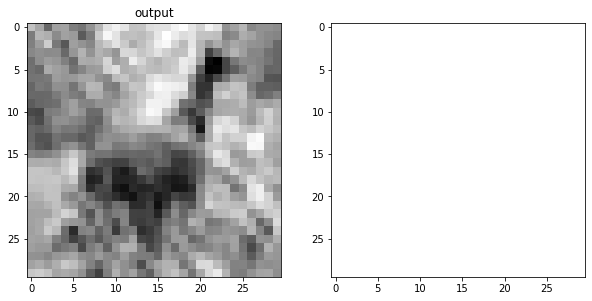

In [13]:
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('data\study\Ch8_F2_PyTorch.png')  # bookskip
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

In [ ]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('data\study\Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [ ]:
mnumel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

In [ ]:
# will raise error
model(img.unsqueeze(0))

In [23]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(8*8*8, 32)
    self.act3 = nn.Tanh()
    self.fc2 = nn.Linear(32, 2)
    
  def forward(self, x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv1(out)))
    out = out.view(-1, 8*8*8)
    out = self.act3(self.fc1(out))
    out = self.fc2(out)
    return out

In [24]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [25]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [26]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [27]:
model(img.unsqueeze(0))

tensor([[-0.0623,  0.1275]], grad_fn=<AddmmBackward>)

In [28]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    for imgs, labels in train_loader:
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()
    if epoch == 1 or epoch % 10 == 0:
      print('{} Epoch {}, Training loss {}'.format(
        datetime.datetime.now(),
        epoch,
        loss_train/len(train_loader))
      )

In [30]:
train_loader = torch.utils.data.DataLoader(
  cifar2,
  batch_size=64,
  shuffle=True)

model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
  n_epochs = 100,
  optimizer = optimizer,
  model = model,
  loss_fn = loss_fn,
  train_loader = train_loader
)

2021-04-15 10:29:42.162956 Epoch 1, Training loss 0.5683928774610446
2021-04-15 10:30:16.313378 Epoch 10, Training loss 0.3269564831142972
2021-04-15 10:30:58.381831 Epoch 20, Training loss 0.2938786323662776
2021-04-15 10:31:38.254107 Epoch 30, Training loss 0.2666007474919034
2021-04-15 10:32:17.224304 Epoch 40, Training loss 0.24896394660708251
2021-04-15 10:32:56.230147 Epoch 50, Training loss 0.22934738850327813
2021-04-15 10:33:35.718436 Epoch 60, Training loss 0.21219400615449163
2021-04-15 10:34:14.813020 Epoch 70, Training loss 0.19558656429219398
2021-04-15 10:34:54.117476 Epoch 80, Training loss 0.17966887051132835
2021-04-15 10:35:32.252151 Epoch 90, Training loss 0.16612274306500033
2021-04-15 10:36:12.912526 Epoch 100, Training loss 0.14904530718922615


In [31]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
  for name, loader in [("train", train_loader), ("val", val_loader)]:
    correct = 0
    total = 0
    
    with torch.no_grad():
      for imgs, labels in loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    
    print("Accuracy {}: {:.2f}".format(name, correct/total))
    
validate(model, train_loader, val_loader)

Accuracy train: 0.95
Accuracy val: 0.90


In [32]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [33]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

## Exercise 1: Change our model to use a 5 × 5 kernel with kernel_size=5 passed to the nn.Conv2d constructor.
### a. What impact does this change have on the number of parameters in the model?
kernal_size = 3, padding = 1: (18090, [432, 16, 1152, 8, 16384, 32, 64, 2])  
kernal_size = 5, padding = 2: (20906, [1200, 16, 3200, 8, 16384, 32, 64, 2])  
kernal_size = 7, padding = 3: (25130, [2352, 16, 6272, 8, 16384, 32, 64, 2])
### b. Does the change improve or degrade overfitting?
kernal_size = 3, padding = 1: Accuracy train/val: 0.95/0.80  
kernal_size = 5, padding = 2: Accuracy train/val: 0.92/0.87  
kernal_size = 7, padding = 3: Accuracy train/val: 0.99/0.88
### c. Read https://pytorch.org/docs/stable/nn.html#conv2d.
### d. Can you describe what kernel_size=(1,3) will do?
Will use the kernel size of 1 row, 3 columns.
### e. How does the model behave with such a kernel?
kernal_size = (1, 3), padding = (0, 1): Accuracy train/val: 0.91/0.87  
kernal_size = (3, 1), padding = (1, 0): Accuracy train/val: 0.96/0.89  
kernel_size = (5, 3), padding = (2, 1): Accuracy train/val: 0.95/0.88  
kernel_size = (3, 5), padding = (1, 2): Accuracy train/val: 0.96/0.89

In [236]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=(3, 5), padding=(1, 2))
        self.conv2 = nn.Conv2d(16, 8, kernel_size=(3, 5), padding=(1, 2))
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [237]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(16656, [45, 1, 120, 8, 16384, 32, 64, 2])

In [238]:
train_loader = torch.utils.data.DataLoader(
  cifar2,
  batch_size=64,
  shuffle=True)

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
  n_epochs = 100,
  optimizer = optimizer,
  model = model,
  loss_fn = loss_fn,
  train_loader = train_loader
)

2021-04-15 14:39:05.229240 Epoch 1, Training loss 0.5506256739045404
2021-04-15 14:39:15.563149 Epoch 10, Training loss 0.4008018965743909
2021-04-15 14:39:26.547870 Epoch 20, Training loss 0.35140253983105824
2021-04-15 14:39:37.297243 Epoch 30, Training loss 0.32486638037642096
2021-04-15 14:39:48.471137 Epoch 40, Training loss 0.30326284411226867
2021-04-15 14:39:59.892093 Epoch 50, Training loss 0.28522623425266547
2021-04-15 14:40:11.375976 Epoch 60, Training loss 0.2764843904478535
2021-04-15 14:40:22.795735 Epoch 70, Training loss 0.2658772805503979
2021-04-15 14:40:34.501880 Epoch 80, Training loss 0.2627142775495341
2021-04-15 14:40:45.946158 Epoch 90, Training loss 0.25200486567559516
2021-04-15 14:40:57.315824 Epoch 100, Training loss 0.24853992756384952


In [239]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
  for name, loader in [("train", train_loader), ("val", val_loader)]:
    correct = 0
    total = 0
    
    with torch.no_grad():
      for imgs, labels in loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    
    print("Accuracy {}: {:.2f}".format(name, correct/total))
    
validate(model, train_loader, val_loader)

Accuracy train: 0.88
Accuracy val: 0.86


## Exercise 2: Can you find an image that contains neither a bird nor an airplane, but that the model claims has one or the other with more than 95% confidence?
diamond.jpg
### a. Can you manually edit a neutral image to make it more airplane-like?
banana
banana_airplane
### b. Can you manually edit an airplane image to trick the model into reporting a bird?
airplane
airplane_bird
### c. Do these tasks get easier with a network with less capacity? More capacity?
May get easier with more capacity, because it can extract more features.
With 5 channels:

In [240]:
from torchvision import transforms
preprocess = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  ])
softmax = nn.Softmax(dim=1)

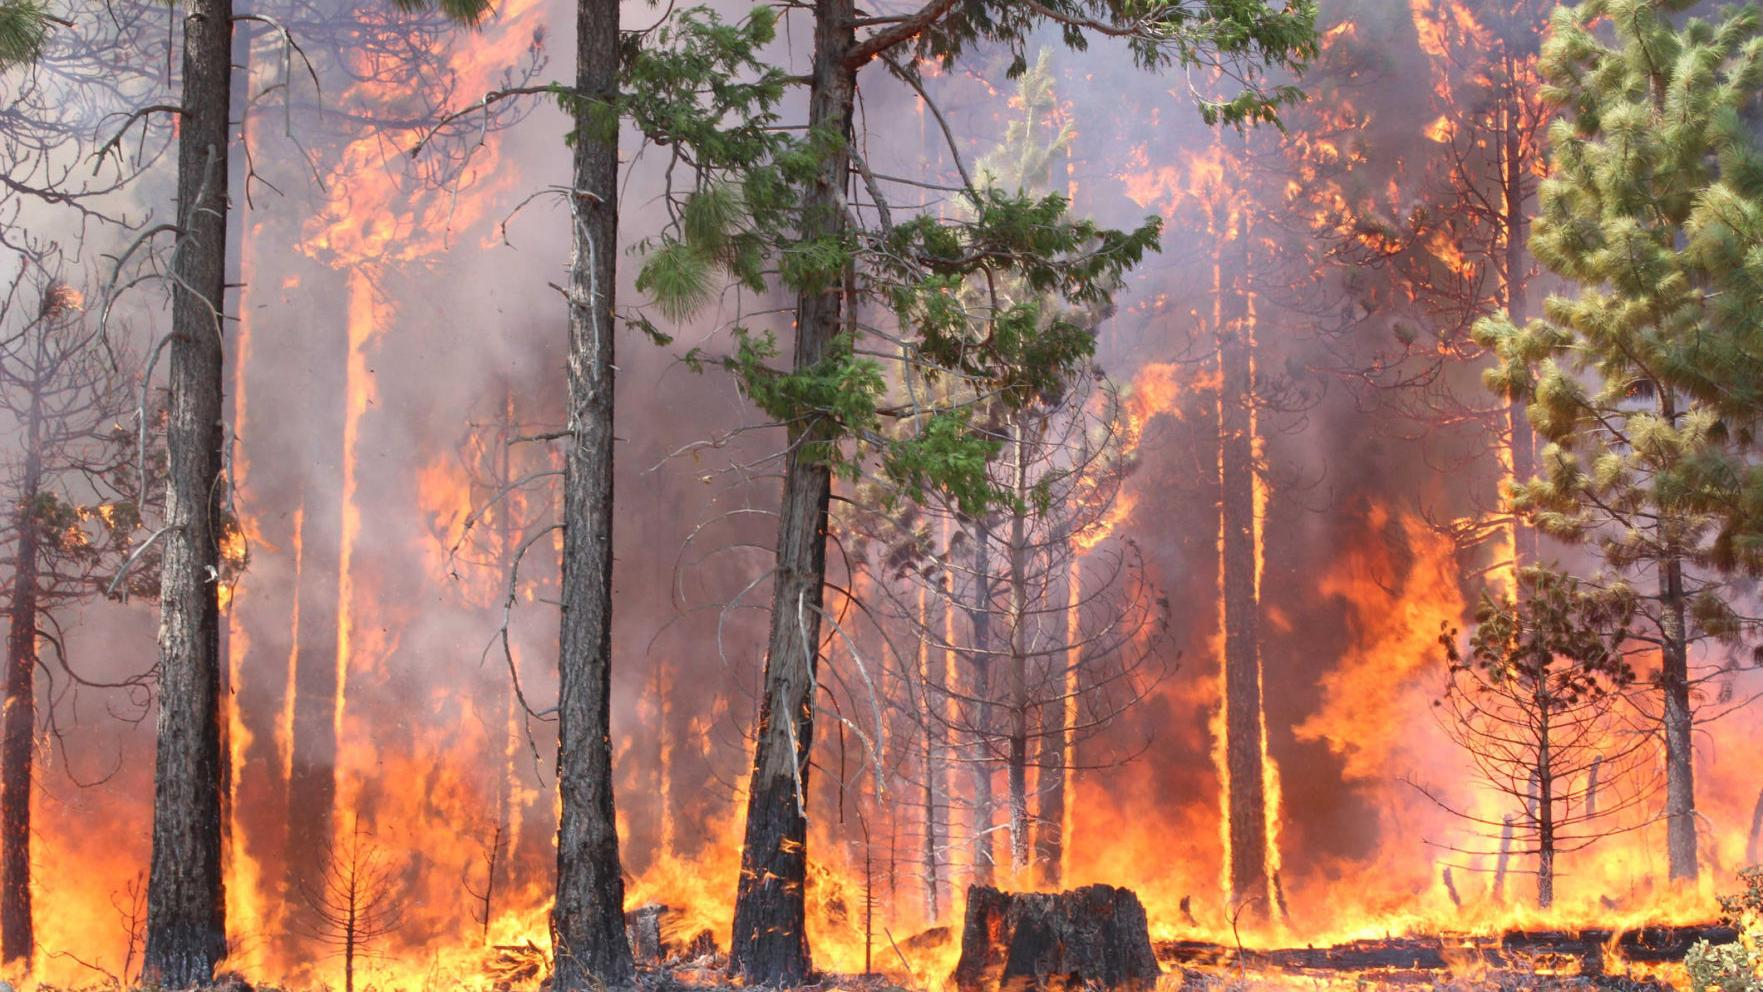

In [247]:
input = "forestfire"
from PIL import Image

img = Image.open("data/photos/{}.jpg".format(input))
img

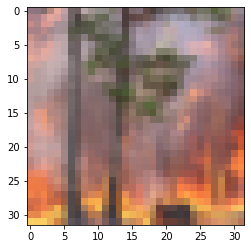

In [248]:
img_t = preprocess(img)
plt.imshow(img_t.permute(1, 2, 0))

In [249]:
with torch.no_grad():
  out = model(img_t.unsqueeze(0))
  _, predicted = torch.max(out, dim=1)

softmax(out), class_names[predicted]

(tensor([[0.0321, 0.9679]]), 'bird')